In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading dataset
energy_dataset = pd.read_excel('energy_dataset.xlsx')

In [3]:
energy_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Analyse class columns

In [4]:
print("The highes Heating load is: {}".format(np.max(energy_dataset['Y1'])))
print("The highes Cooling load is: {}".format(np.max(energy_dataset['Y2'])))

The highes Heating load is: 43.1
The highes Cooling load is: 48.03


In [5]:
print("The lowest Heating load is: {}".format(np.min(energy_dataset['Y1'])))
print("The lowest Cooling load is: {}".format(np.min(energy_dataset['Y2'])))

The lowest Heating load is: 6.01
The lowest Cooling load is: 10.9


In [6]:
print("The mean of Heating load is: {}".format(np.mean(energy_dataset['Y1'])))
print("The mean of Cooling load is: {}".format(np.mean(energy_dataset['Y2'])))

The mean of Heating load is: 22.30719531249997
The mean of Cooling load is: 24.58776041666671


In [7]:
print("The standard deviation of Heating load is: {}".format(np.std(energy_dataset['Y1'])))
print("The standard deviation of Cooling load is: {}".format(np.std(energy_dataset['Y2'])))

The standard deviation of Heating load is: 10.08363268719098
The standard deviation of Cooling load is: 9.50710998657144


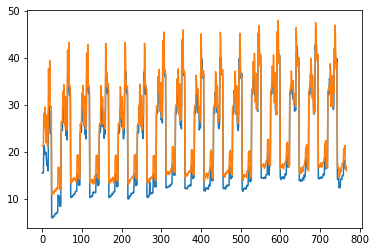

In [8]:
plt.plot(energy_dataset['Y1'])
plt.plot(energy_dataset['Y2'])
plt.show()

In [9]:
import scipy.stats as stats

In [10]:
fit = stats.norm.pdf(energy_dataset['Y2'], np.mean(energy_dataset['Y2']), np.std(energy_dataset['Y2']))

AttributeError: 'Rectangle' object has no property 'normed'

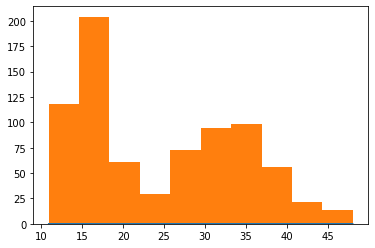

In [11]:
plt.plot(energy_dataset['Y2'],fit,)
plt.hist(energy_dataset['Y2'], normed=True)
plt.show()

## Data preprocessing

In [12]:
high_heat = energy_dataset.Y1 >= 22
low_heat = energy_dataset.Y1 < 22
energy_dataset.loc[high_heat,'Y1'] = 1
energy_dataset.loc[low_heat,'Y1'] = 0

high_cool = energy_dataset.Y2 >= 24
low_cool = energy_dataset.Y2 < 24
energy_dataset.loc[high_cool,'Y2'] = 1
energy_dataset.loc[low_cool,'Y2'] = 0

In [13]:
energy_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0.0,1.0


In [14]:
features = energy_dataset.iloc[:, :-2].values
labels_heat = energy_dataset.iloc[:, -2].values
labels_cool = energy_dataset.iloc[:, -1].values

In [15]:
print(features[:10])
print(labels_heat[:10])
print(labels_cool[:10])

[[  0.98 514.5  294.   110.25   7.     2.     0.     0.  ]
 [  0.98 514.5  294.   110.25   7.     3.     0.     0.  ]
 [  0.98 514.5  294.   110.25   7.     4.     0.     0.  ]
 [  0.98 514.5  294.   110.25   7.     5.     0.     0.  ]
 [  0.9  563.5  318.5  122.5    7.     2.     0.     0.  ]
 [  0.9  563.5  318.5  122.5    7.     3.     0.     0.  ]
 [  0.9  563.5  318.5  122.5    7.     4.     0.     0.  ]
 [  0.9  563.5  318.5  122.5    7.     5.     0.     0.  ]
 [  0.86 588.   294.   147.     7.     2.     0.     0.  ]
 [  0.86 588.   294.   147.     7.     3.     0.     0.  ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]


## Scaling data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaller = StandardScaler()
features = scaller.fit_transform(features)

In [18]:
print(features[0])

[ 2.04177671 -1.78587489 -0.56195149 -1.47007664  1.         -1.34164079
 -1.76044698 -1.81457514]


## Spliting to training and testing parts

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(features, labels_cool, test_size=0.3)
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(features, labels_heat, test_size=0.3)

# Predicting time

## (Optional) Predicting using custom algorithm

In [23]:
from naive_b_custom import *

In [24]:
custom_nb_cold = NaiveBayesClassifier()
custom_nb_heat = NaiveBayesClassifier()

In [25]:
custom_nb_cold.fit(X_train_cool, y_train_cool)
custom_nb_heat.fit(X_train_heat, y_train_heat)

In [26]:
predicted_custom_cool = custom_nb_cold.predict(X_test_cool, radius=1.3)
print("Custom naive_cool accuracy: ", accuracy(predicted_custom_cool, y_test_cool))
predicted_custom_heat = custom_nb_heat.predict(X_test_heat, radius=1)
print("Custom naive_heat accuracy: ", accuracy(predicted_custom_heat, y_test_heat))

Custom naive_cool accuracy:  98.7012987012987


ZeroDivisionError: float division by zero

## Predicting using Sklearn

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
cold_bayes = GaussianNB()
cold_bayes.fit(X_train_cool, y_train_cool)

GaussianNB()

In [29]:
pred_cold = cold_bayes.predict(X_test_cool)
print("Cold sklearn accuray: {}".format(accuracy(pred_cold, y_test_cool)))

Cold sklearn accuray: 98.26839826839827


In [30]:
heat_bayes = GaussianNB()
heat_bayes.fit(X_train_heat, y_train_heat)

GaussianNB()

In [31]:
pred_hot = heat_bayes.predict(X_test_heat)
print("Cold sklearn accuray: {}".format(accuracy(pred_hot, y_test_heat)))

Cold sklearn accuray: 97.83549783549783


In [34]:
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.model_selection import cross_val_score

precisions = cross_val_score(cold_bayes, X_train_heat, y_train_heat, cv=10, scoring='precision')
print('Precision(Heat) =>> P = True_positive / (True_positive + False_positive): ', np.mean(precisions))

recalls = cross_val_score(cold_bayes, X_train_heat, y_train_heat, cv=5, scoring='recall')
print('Recalls(Heat) =>> True_positive / (True_positive + False_negative): ', np.mean(recalls))

Precision(Heat) =>> P = True_positive / (True_positive + False_positive):  0.9601750101750101
Recalls(Heat) =>> True_positive / (True_positive + False_negative):  1.0


In [38]:
from sklearn.model_selection import cross_val_score

precisions = cross_val_score(heat_bayes, X_train_cool, y_train_cool, cv=10, scoring='precision')
print('Precision(Heat) =>> P = True_positive / (True_positive + False_positive): ', np.mean(precisions))

recalls = cross_val_score(heat_bayes, X_train_cool, y_train_cool, cv=5, scoring='recall')
print('Recalls(Heat) =>> True_positive / (True_positive + False_negative): ', np.mean(recalls))

Precision(Heat) =>> P = True_positive / (True_positive + False_positive):  0.9811965811965813
Recalls(Heat) =>> True_positive / (True_positive + False_negative):  1.0
